In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Loan_Dataset.csv')

In [3]:
# Step 1: Data Preprocessing and Feature Engineering
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Handle missing values (you can also consider imputation)
df.dropna(inplace=True)  # Here, we simply drop rows with missing values for simplicity

# Encode categorical variables (e.g., gender, loan purpose) with LabelEncoder or OneHotEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Feature Scaling for numerical features (if needed for interpretability)
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

Missing values per column:
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [6]:
# Step 2: Define Features and Target Variable

# Assume the target column is 'Credit_History' (1 = Defaulted, 0 = Not Defaulted)
X = df.drop('Credit_History', axis=1)
y = df['Credit_History']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Step 3: Building the Decision Tree Model

# Instantiate the DecisionTreeClassifier (tuning hyperparameters like max_depth as needed)
# Change to DecisionTreeRegressor for continuous target variables
from sklearn.tree import DecisionTreeRegressor # Import the regressor

model = DecisionTreeRegressor(max_depth=4, random_state=42) # Instantiate regressor
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [10]:
# Step 4: Model Evaluation

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using metrics appropriate for regression
from sklearn.metrics import mean_squared_error, r2_score # Import regression metrics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1.20
R-squared: -0.02


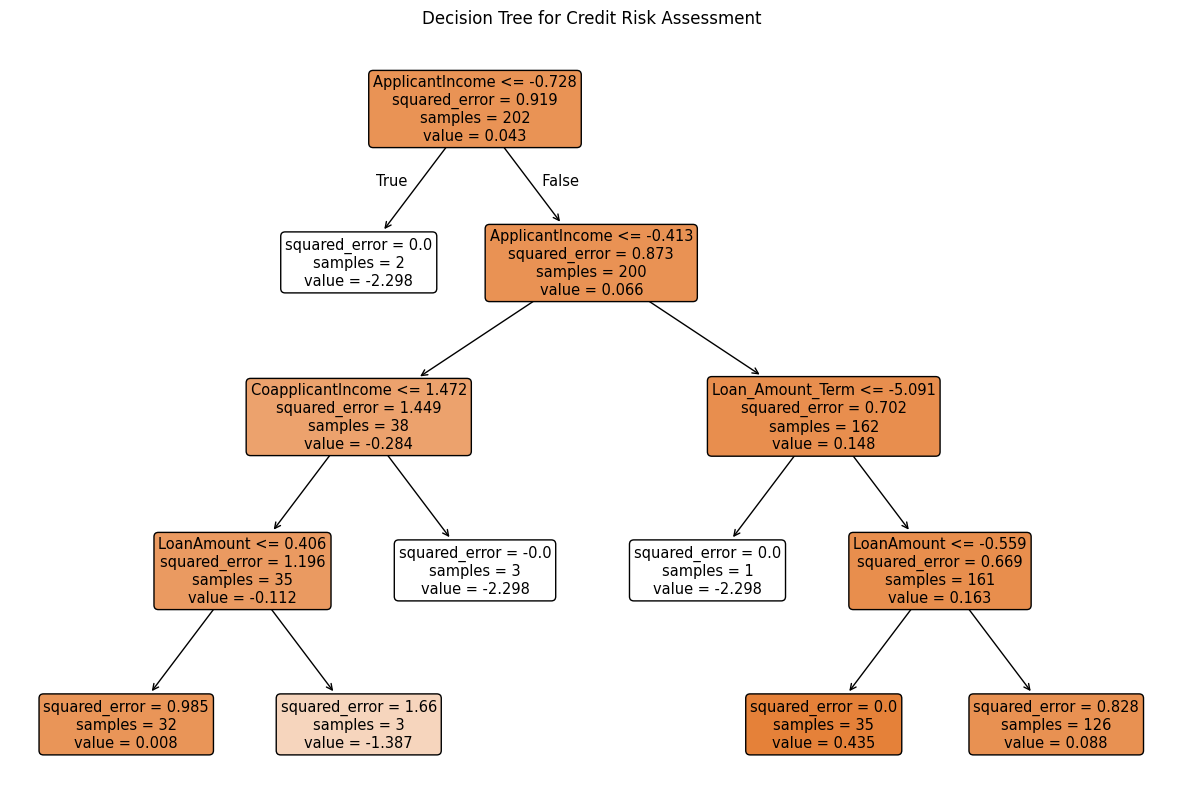

In [11]:
# Step 5: Interpret the Decision Tree

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['No Default', 'Default'], filled=True, rounded=True)
plt.title("Decision Tree for Credit Risk Assessment")
plt.show()

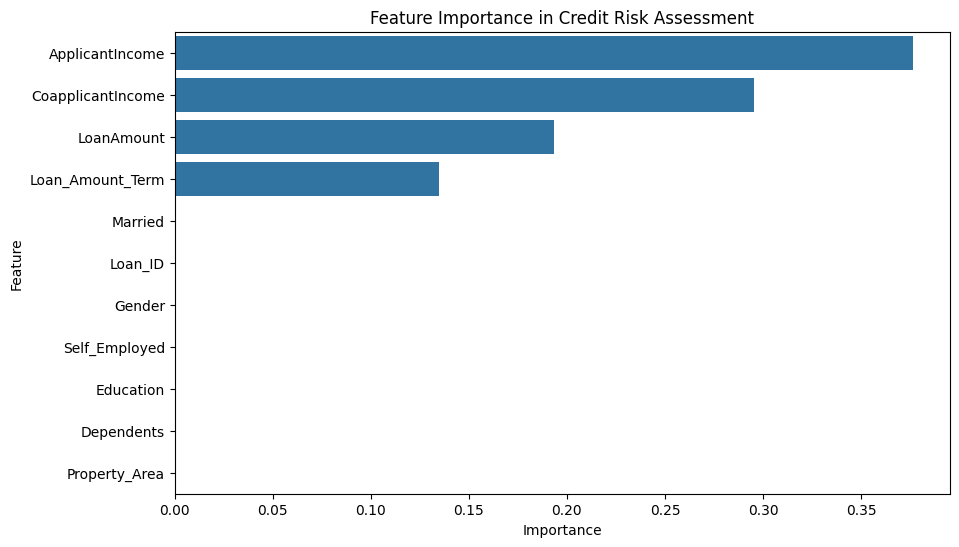

In [12]:
# Step 6: Feature Importance

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance in Credit Risk Assessment")
plt.show()